<a href="https://colab.research.google.com/github/Ankit2058/Fruit-Classification/blob/main/Custom_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have two dataset of rooten and fresh banana

First i need to mount the google drive to acces them

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

In [4]:

F_Banana = "/content/drive/MyDrive/Major_Project/F_Banana"
S_Banana = "/content/drive/MyDrive/Major_Project/S_Banana"

data = []
labels = []

# Function to load images
def load_image(file_path):
    image = Image.open(file_path).convert('RGB')  # Convert to RGB
    image = image.resize((64, 64))  # Resize images to a common size (e.g., 128x128)
    return np.array(image)

# Load images from folder 1 and label as 0
for file_name in os.listdir(F_Banana):
    if file_name.endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(F_Banana, file_name)
        image_array = load_image(file_path)
        data.append(image_array)
        labels.append(0)

# Load images from folder 2 and label as 1
for file_name in os.listdir(S_Banana):
    if file_name.endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(S_Banana, file_name)
        image_array = load_image(file_path)
        data.append(image_array)
        labels.append(1)


In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


In [7]:
print(type(train_labels[3]))

<class 'numpy.int64'>


Label: 0


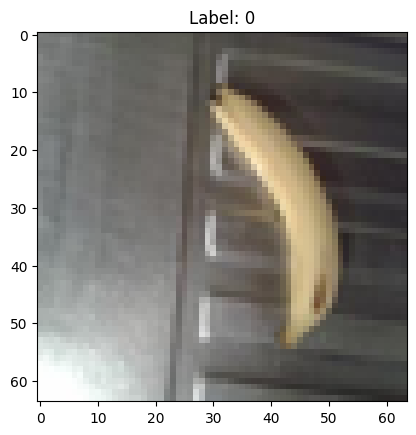

In [8]:
#we are defining plotting funtion to ease our process of looking at the data
def plotting(image,label):

# Get the first item in the training data
  #image, label = data

# Print the label
  print(f"Label: {label}")

# Plot the image
  plt.imshow(image.squeeze(),cmap='gray') #we squeeze the image to reduce its dimension to 2D for the purpose of plotting.
#The third dimension was used to index the image and it dosent hold any meaning for image representation so we squeeze it
# cmap defines color mapping, checkout these options for further clarity 1)gray 2)viridis(default) 3)plasma 4)inferno 5)magma ......and many more
  plt.title(f"Label: {label}")
  plt.show()

#lets test our funtion
plotting(train_data[45],train_labels[45])

In [9]:
print(train_data[45].shape)

(64, 64, 3)


In [10]:
print(f"we have {len(train_data)} data for training and {len(test_data)} for testing")
#we have a huge dataset and we cant inset it directly into the

we have 480 data for training and 120 for testing


In [11]:
#lets see what one particular data looks like
image=train_data[89]
print(image)

[[[207 222 217]
  [203 218 213]
  [192 207 202]
  ...
  [ 88  92  91]
  [ 88  92  91]
  [ 90  94  93]]

 [[197 212 207]
  [195 210 205]
  [189 204 199]
  ...
  [103 107 106]
  [103 107 106]
  [102 106 105]]

 [[198 213 208]
  [194 209 204]
  [190 205 200]
  ...
  [109 113 112]
  [110 114 113]
  [111 115 114]]

 ...

 [[232 247 242]
  [223 238 233]
  [218 233 228]
  ...
  [ 58  60  59]
  [ 56  58  57]
  [ 56  58  57]]

 [[225 240 235]
  [220 235 230]
  [218 233 228]
  ...
  [ 59  61  60]
  [ 57  59  58]
  [ 58  60  59]]

 [[215 230 225]
  [211 226 221]
  [219 234 229]
  ...
  [ 62  64  63]
  [ 58  60  59]
  [ 59  61  60]]]


its an matrics of numbers.

In [12]:
#Working with nn we first need to define or import the model we will be training upon
#lets just define it!
class neural_network(torch.nn.Module):
  #we define the skeleton of our model using class and instante an model as an object, here you will find _init_(constructor) which instanciate every model with attributes flatten and linear_relu_stack that hold the object of the instantiated class
  def __init__(self):
    super(neural_network,self).__init__()
    self.flatten=torch.nn.Flatten() #self.flatten is instanciated from torch.nn.Flatten
    #self is used to bring the defined attribute,function out of the  _init_ funtion scope
    #Anything defined with "self"prefix has its scope across the class
    self.linear_relu_stack=torch.nn.Sequential(
        nn.Linear(64*64*3,12288),
        nn.ReLU(),
        nn.Linear(12288,12288),
        nn.ReLU(),
        nn.Linear(12288,1024),
        nn.ReLU(),
        nn.Linear(1024,2)
    )
    #Then we defin a forward funtion to propagate input data throught the model
  def forward(self,x):
     x = self.flatten(x)
     logits = self.linear_relu_stack(x)
     return logits

In [13]:
#now lets define a model as an instane of the neural_network class
model=neural_network();

In [14]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epoch=10
batch_size=64

In [15]:
# Converting the NumPy arrays to PyTorch tensors
train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_data_tensor = torch.tensor(test_data, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Normalizing the data (if necessary)
train_data_tensor /= 255.0
test_data_tensor /= 255.0

# Creating Tensor Datasets
train_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)

# Set batch size
batch_size = 32  # You can adjust this value

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Now, train_loader and test_loader are ready for training and testing your model


In [16]:
#so we have build up all of our arsenal required for the final job of training our small model and test how well it did its job
#now lets train our model
#here we define the tarining_looop which takes dataloader which feeds data in batches, training_loop further takes model itself, loss function and optimizer.
#the sole purpose here is to calculate the loss using loss_fn on the ouput of the model when inputed with dataloader input and optimize model parameter using the optimizer specified in the argument
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
      #In this loop batch hold the batch value given by dataloader and X and y values yet again from dataloader
      #X dosent hold a single image rather it holds batch of images
      #We loop through every batch of image
      #And perform following computation, every batch
        # Compute prediction and loss
        pred = model(X)
        #Output of batch of images
        loss = loss_fn(pred, y)
        #single loss value if computed from the batch of output

        # Backpropagation
        loss.backward()
        #we propgate the loss back to each layers for gradient computation
        optimizer.step()
        #Then we optimize the model parameter
        optimizer.zero_grad()
        #Everytime we backpropagate, gradients value gets stored for optimization purposes, but if not set to zero the gradient of next batch will be accumulated
        #now if you want to optimize the model after every 5 batches of data then do zero-grad after every 5 batches, till then the gradient of each of those 5 batches will be accumulated
        #but for now we want to optimize the model after each batch so we need to zero-grad after every batch

        if batch % 100 == 0:
            print(batch)
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [17]:
#now all we need to do is train and test the model for the number of times(epochs) we want
epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
print("DONE!")

Epoch 1
-------------------------------
0
loss: 0.702107  [   32/  480]
Test Error: 
 Accuracy: 96.7%, Avg loss: 0.682476 

DONE!


In [ ]:
# directly loading the model parameters if you have already trained the model
model.load_state_dict(torch.load("model.pth"))
model.eval()  # Set the model to evaluation mode (important for inference)

In [26]:

#here i am checking if the predicted class matches with the actual class
for i in range(5):
  testing=test_images[i]
  print(f"predicted value of the image is {model(testing).argmax(1)}") #this prints the actual class of the test data
  #how it works: model(training) gives the matrices of ouput, argmax(1) gives the index of the value within the output with the highest value(highest value in the output denote the predicted class)
  plotting(test_images[i],test_labels[i])
  #plotting function shows the image in the data along with label


NameError: name 'test_images' is not defined